<a href="https://colab.research.google.com/github/sabrinaakter0628/Machine-Learning/blob/lab4/SVM_DT_RF_TASK_2022_1_60_417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset description

This dataset records detailed information about ticket sales and customer behavior at a cinema hall, offering insights into various aspects such as demographics, movie genre preferences, seat selection, ticket pricing, and customer retention patterns. It is designed to help analyze customer engagement, spending behavior, and factors that influence repeat visits to the cinema. The data is useful for predictive modeling and can support decision-making processes related to customer retention, marketing strategies, and optimizing cinema operations.

Columns Overview:

**Ticket_ID (Categorical):**

Description: A unique alphanumeric identifier for each ticket purchase. The ID consists of a random uppercase letter (A-Z) followed by a 4-digit number (e.g., B7539, Y1344).
Significance: This column helps identify each individual transaction. It's a categorical variable, essential for tracking specific customer purchases but not related to other variables directly.

**Age (Numerical):**

Description: The age of the customer who purchased the ticket, ranging between 18 and 60 years.
Significance: Age is an important demographic feature, providing insights into customer segments. For example, younger audiences might prefer different movie genres or seating types compared to older customers. Analyzing age data can help cinema halls cater to the needs of various age groups.

**Ticket_Price (Numerical):**

Description: The price the customer paid for the ticket, typically ranging from $10 to $25. The price varies based on factors like movie time, seat type, or cinema location.
Significance: Ticket price reflects customer spending and the cinema's pricing strategy. Understanding how ticket pricing impacts customer behavior can help optimize ticket sales and maximize revenue.

**Movie_Genre (Categorical):**

Description: The genre of the movie the customer attended, which can include one of the following: Action, Comedy, Horror, Drama, or Sci-Fi.
Significance: Genre preferences are crucial for understanding customer interests. Analyzing which genres are most popular can guide movie scheduling, marketing strategies, and even help in curating personalized recommendations for customers.

**Seat_Type (Ordinal):**

Description: The type of seat selected by the customer, with three ordinal categories:
Standard (Basic seating option)
Premium (Enhanced seating with added comfort)
VIP (Exclusive seating, offering premium features like extra legroom and priority service)
Significance: Seat type provides insights into customer spending behavior. Premium and VIP seat types typically correlate with higher ticket prices, and understanding seat preferences can help in optimizing cinema layout and pricing strategies. Additionally, this column can be used to gauge the popularity of high-end seating options.

**Number_of_Person (Mixed Variable):**

Description: The number of people accompanying the customer. This can either be:
Alone: The customer attended alone.
2–7: The customer attended with a group of 2 to 7 people.
Significance: Group size is an important factor in understanding customer preferences and behavior. For example, groups might purchase more tickets or opt for different movie genres and seat types than solo attendees. This column is crucial for analyzing social dynamics and group behavior in cinema attendance.

**Purchase_Again (Target - Binary):**

Description: A binary target variable indicating whether the customer is likely to return and purchase another ticket. It has two possible values:
Yes: The customer is likely to return for another movie.
No: The customer is not likely to return.
Significance: This is the key column for predictive modeling. It is used to assess customer retention and predict the likelihood of future ticket purchases. Analyzing the factors that influence repeat purchases (e.g., age, genre preferences, seat types) helps cinema halls optimize marketing and customer engagement strategies.


#Task

1. Rename this notebook with your id
2. Load given dataset
3. Display dataset information and clean the data (print first 15 rows, show all column name, check for null, handle null values, show all unique values for non numeric column)
4. Map the non numeric colum using dictionary. Note, your target column is "Purchase_Again".

5. Apply Machine learning algorithms (SVM, DT and RF) and display their accuracy, precision, recall, confusin matrix. Note, you MUST write your findings after each code blocks. This is where you discuss regarding the reuslt you received.

6. Make a comparison table with all the results from different ML Algos.

7. Apply "grid search" to improve the achieved results for SVM, DT and random forest. Hint: you need to find what are the parameters to be tuned and what is their expected range. Accordingly, set 'grid search' parameters.

8. Suggest and use anyother parameter tuning technique that is more suitable that grid search for any of these ML Alogs. Justify your choice.

9. Finally, report the best models that you created. Justify why it is best. Carefully report required performance measures. Hints: Different performance measures may be selected for balanced vs unbalanced dataset.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**TASK** **2**





In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cse475/lab4/cinema_hall_ticket_sales.csv")

df

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
...,...,...,...,...,...,...,...
1435,E5406,41,17.09,Sci-Fi,Standard,2,Yes
1436,C4357,19,11.45,Action,Standard,Alone,No
1437,R7285,53,17.13,Comedy,Premium,Alone,Yes
1438,W6360,34,20.25,Comedy,Premium,2,Yes


**TASK** **3**

**Display Dataset info**

In [ ]:
df.head(15)

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
5,E5655,28,11.58,Horror,VIP,Alone,Yes
6,P1526,50,22.91,Action,Standard,Alone,Yes
7,V4726,44,23.09,Sci-Fi,Premium,7,Yes
8,A2029,46,12.12,Sci-Fi,Standard,Alone,Yes
9,P0092,48,19.63,Action,VIP,Alone,Yes


In [ ]:
df.isnull().sum()

,0
Ticket_ID,0
Age,0
Ticket_Price,0
Movie_Genre,0
Seat_Type,0
Number_of_Person,0
Purchase_Again,0


In [ ]:
df_copy = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticket_ID         1440 non-null   object 
 1   Age               1440 non-null   int64  
 2   Ticket_Price      1440 non-null   float64
 3   Movie_Genre       1440 non-null   object 
 4   Seat_Type         1440 non-null   object 
 5   Number_of_Person  1440 non-null   object 
 6   Purchase_Again    1440 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 78.9+ KB


**TASK 4**

**Mapping**

In [ ]:
df['Ticket_ID'].unique()

array(['N4369', 'B8091', 'V6341', ..., 'R7285', 'W6360', 'Z8034'],
      dtype=object)

In [ ]:
df['Movie_Genre'].unique()

array(['Comedy', 'Drama', 'Horror', 'Action', 'Sci-Fi'], dtype=object)

In [ ]:
df['Seat_Type'].unique()

array(['Standard', 'VIP', 'Premium'], dtype=object)

In [ ]:
df['Number_of_Person'].unique()

array(['7', 'Alone', '3', '6', '4', '2', '5'], dtype=object)

In [ ]:
df['Purchase_Again'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Manually map categorical values to numerical values
mappings = {
    "Movie_Genre": {"Sci-Fi": 4, "Comedy": 3, "Drama": 2, "Horror": 1, "Action": 0},
    "Seat_Type": { "Premium": 2, "VIP": 1, "Standard": 0},
    "Number_of_Person": {"2": 2, "3": 3, "4": 4, "5": 5 , "6": 6 , "7": 7 , "Alone": 8},
    "Purchase_Again": {"No": 0, "Yes": 1}
}

df.replace(mappings, inplace=True)

<ipython-input-13-49f86683f72a>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mappings, inplace=True)


In [ ]:
df

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,3,0,7,0
1,B8091,35,19.02,2,0,8,1
2,V6341,55,22.52,1,1,3,0
3,B3243,53,23.01,2,0,6,1
4,I3814,30,21.81,3,1,4,1
...,...,...,...,...,...,...,...
1435,E5406,41,17.09,4,0,2,1
1436,C4357,19,11.45,0,0,8,0
1437,R7285,53,17.13,3,2,8,1
1438,W6360,34,20.25,3,2,2,1


In [ ]:
df.drop(columns=['Ticket_ID'],inplace=True)

In [ ]:
df

,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,55,12.27,3,0,7,0
1,35,19.02,2,0,8,1
2,55,22.52,1,1,3,0
3,53,23.01,2,0,6,1
4,30,21.81,3,1,4,1
...,...,...,...,...,...,...
1435,41,17.09,4,0,2,1
1436,19,11.45,0,0,8,0
1437,53,17.13,3,2,8,1
1438,34,20.25,3,2,2,1


In [ ]:
correlation = df.corr()
correlation

,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
Age,1.000000,0.036528,-0.052826,-0.045480,-0.022110,0.023401
Ticket_Price,0.036528,1.000000,0.037910,0.029703,0.023807,-0.022706
Movie_Genre,-0.052826,0.037910,1.000000,-0.025172,-0.027971,-0.041528
Seat_Type,-0.045480,0.029703,-0.025172,1.000000,-0.017702,-0.034339
Number_of_Person,-0.022110,0.023807,-0.027971,-0.017702,1.000000,0.024643
Purchase_Again,0.023401,-0.022706,-0.041528,-0.034339,0.024643,1.000000


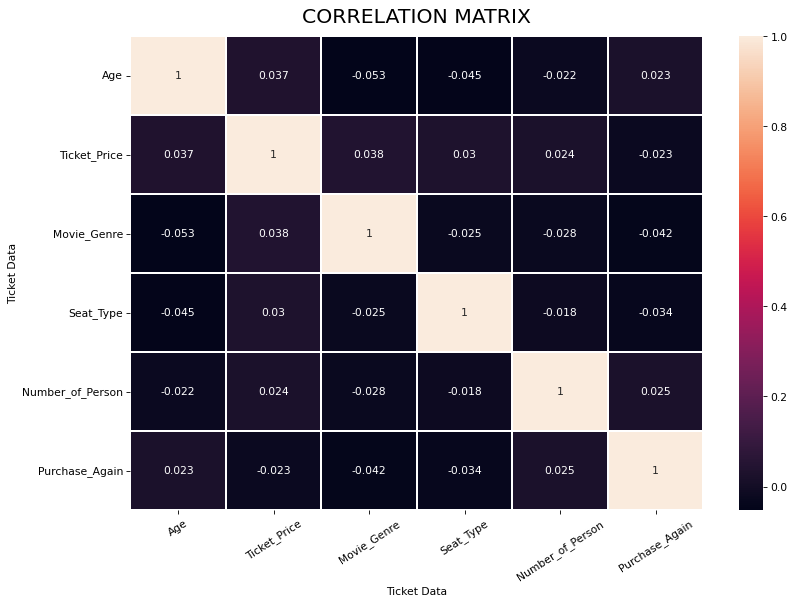

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Ticket Data')
plt.ylabel('Ticket Data')
plt.xticks(rotation=33)
plt.show()

**TASK 5**

**Model**

In [ ]:
X=df.drop(columns=['Purchase_Again'])
Y=df['Purchase_Again']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:

model = SVC(kernel='linear', random_state=42)

model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1
 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.5034722222222222
Precision: 0.5188679245283019
Recall (Sensitivity): 0.3741496598639456
F1-Score: 0.43478260869565216


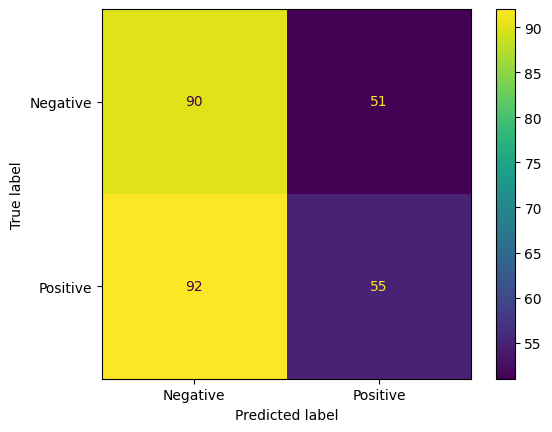

In [ ]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1])

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.5416666666666666
Precision: 0.5539568345323741
Recall (Sensitivity): 0.5238095238095238
F1-Score: 0.5384615384615384


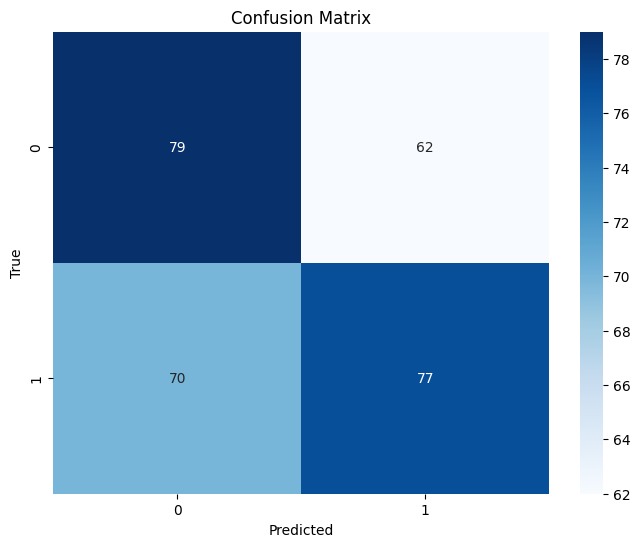

In [ ]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

[Text(0.5201372736772614, 0.9821428571428571, 'Ticket_Price <= 10.19\ngini = 0.5\nsamples = 1440\nvalue = [733, 707]'),
 Text(0.39317533895039236, 0.9464285714285714, 'Age <= 24.5\ngini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(0.45665630631382687, 0.9642857142857142, 'True  '),
 Text(0.388691034017657, 0.9107142857142857, 'Ticket_Price <= 10.035\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.38644888155128926, 0.875, ' Movie_Genre <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.38420672908492154, 0.8392857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.388691034017657, 0.8392857142857143, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.39093318648402464, 0.875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3976596438831278, 0.9107142857142857, 'Number_of_Person <= 3.0\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.3954174914167601, 0.875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3999017963494955, 0.875, 'Ticket_Pric

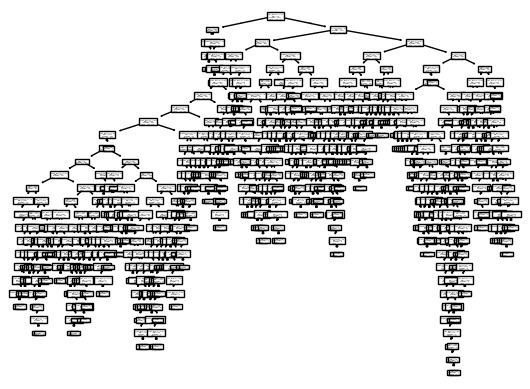

In [ ]:
features = ['Age', 'Ticket_Price', ' Movie_Genre', 'Seat_Type', 'Number_of_Person']
tree.plot_tree(dtree, feature_names=features)

In [ ]:
print(dtree.predict([[40, 10, 2, 1,0]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.5416666666666666
Precision: 0.5539568345323741
Recall (Sensitivity): 0.5238095238095238
F1-Score: 0.5384615384615384


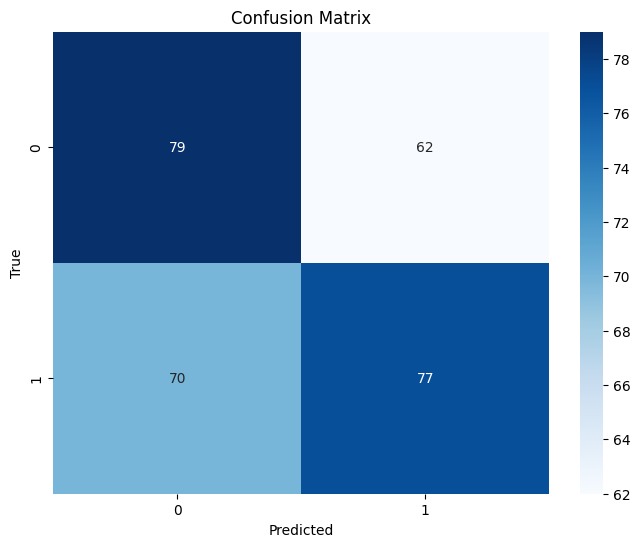

In [ ]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**TASK 6**

| Model   | Accuracy | Precision       | Recall  | F1-Score  |
|---------|-----|------------|-------------|----------|
| SVM   | 50.35  | 51.89  | 37.41          |43.48    |
| Random Forest   | 54.17  | 55.39  | 52.38      | 53.85     |
| Decision Tree | 54.17 | 55.39    | 52.38    | 53.85     |



**TASK 7**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Smaller parameter grid to reduce combinations
svm_param_grid = {
    'C': [0.1, 1],  # Removed 10
    'kernel': ['linear', 'rbf'],  # Removed 'poly'
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 30],  # Removed None, 20
}

rf_param_grid = {
    'n_estimators': [50, 100],  # Removed 200
    'max_depth': [10, 30],  # Removed None, 20
}

# Use fewer cross-validation folds (cv=3)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Train models with Grid Search
svm_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Get best parameters
print("Best SVM parameters:", svm_grid.best_params_)
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best Random Forest parameters:", rf_grid.best_params_)

# Get best scores
print("Best SVM accuracy:", svm_grid.best_score_)
print("Best Decision Tree accuracy:", dt_grid.best_score_)
print("Best Random Forest accuracy:", rf_grid.best_score_)


Best SVM parameters: {'C': 0.1, 'kernel': 'rbf'}
Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 10}
Best Random Forest parameters: {'max_depth': 30, 'n_estimators': 100}
Best SVM accuracy: 0.513888888888889
Best Decision Tree accuracy: 0.5460069444444443
Best Random Forest accuracy: 0.5407986111111112


**Task** **8**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid with a wider range
rf_param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Testing more values
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15],
}

# Apply RandomizedSearchCV
rf_random = RandomizedSearchCV(RandomForestClassifier(), rf_param_dist,
                               n_iter=10,  # Only testing 10 random combinations
                               cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

rf_random.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Random Forest parameters:", rf_random.best_params_)
print("Best Random Forest accuracy:", rf_random.best_score_)


Best Random Forest parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 20}
Best Random Forest accuracy: 0.5503472222222223


Faster than Grid Search (tests fewer combinations).
Finds good parameters quickly (even if not the absolute best).
Great for complex models like Random Forest (which has many hyperparameters)

**TASK** **9**

rom Grid Search:

SVM Accuracy: 0.5139
Decision Tree Accuracy: 0.5460
Random Forest Accuracy: 0.5408
From Randomized Search:

Random Forest Accuracy: 0.5503 (Best so far!)
Best Model: Random Forest (Tuned with Randomized Search)
Why?

It has the highest accuracy (0.5503) after hyperparameter tuning.
Random Forest is robust against overfitting compared to Decision Trees.
It performs better on imbalanced datasets as it reduces variance.
If dataset is balanced: Use accuracy as the main metric.
If dataset is imbalanced: Focus on precision, recall, and F1-score.